### 1.1 1st order Polynomial Regression

In [1]:
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
import sys
from pylab import *

import pandas as pd
import numpy as np
from scipy import stats 
from scipy.stats import linregress
import math
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split 
import tensorflow as tf

/Users/avni/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [12]:
data1 = pd.read_csv('ex2data1.csv')
X1= data1["x"]
y1 = data1["y"]

In [3]:
#generalized gradient descent function for polynomial regression
def gradient_descent(x, y, theta, alpha,precision, max_alpha=0, max_iteration= 1000000 ):
    
    m = len(y) 
    theta_history = [] 
    y_preds = []
    costs = []
    y_pred = np.dot(x, theta)
    error = y_pred - y 
    old_cost = 0
    new_cost = np.sum(error ** 2) / (2 * m)
    costs.append(new_cost)
    
    y_preds.append(y_pred)
    
    theta_history.append(theta)
    iters = 0 # setting iterations to 0
    iters = iters + 1
    while abs(new_cost - old_cost) >= precision: # for optimization
        
        old_cost = new_cost #precision 
        gradient = x.T.dot(error)/m 
        theta = theta - alpha * gradient  #updating weight
        theta_history.append(theta) #storing histoy of weights
        y_pred = np.dot(x, theta)
        error = y_pred - y 
        new_cost = np.sum(error ** 2)/(2 * m)
        costs.append(new_cost)
        y_preds.append(y_pred)
        iters = iters + 1
        
        if iters > max_iteration:
            print("Exceeded maximum iterations")
            break

        
    return theta_history, y_preds, iters, costs, alpha


In [4]:
X_ones = np.c_[np.ones(X1.shape[0]), X1] #adding ones column to the matrix
theta_iters = np.array([0., 0.] )  #creating a numpy array 
theta, y_preds, iterations, cost, alpha = gradient_descent(X_ones, y1, theta_iters, alpha = 0.01,precision = 0.000001, )

In [5]:
def rmse( true_value, predicted_value):
    rmse = np.sqrt(sum((predicted_value - true_value) ** 2) / len(true_value))
    return rmse

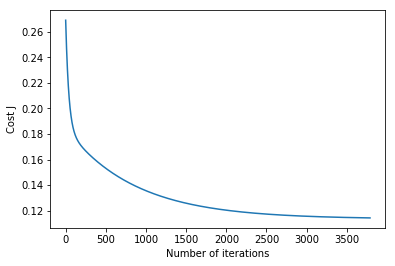

In [6]:
plt.plot(range(len(cost)), cost)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [7]:
rmse = math.sqrt(cost[-1])
print "RMSE = ", rmse
print "Cost = ", cost[-1]

RMSE =  0.338021864173
Cost =  0.114258780659


In [8]:
print "Optimized weights:- w0 =", theta[-1][0], ", w1 =", theta[-1][1]

Optimized weights:- w0 = 0.9924453448136963 , w1 = -1.0389555609777528


In [9]:
X1= X1.reshape(-1,1)
Lin_reg= LinearRegression()
Lin_reg.fit(X1, y1)
predict1_sklearn = Lin_reg.predict(X1)
rmse1_sklearn = mean_squared_error(y1, predict1_sklearn)
print("RMSE= ", rmse1_sklearn)

('RMSE= ', 0.22680474664693515)


/Users/avni/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


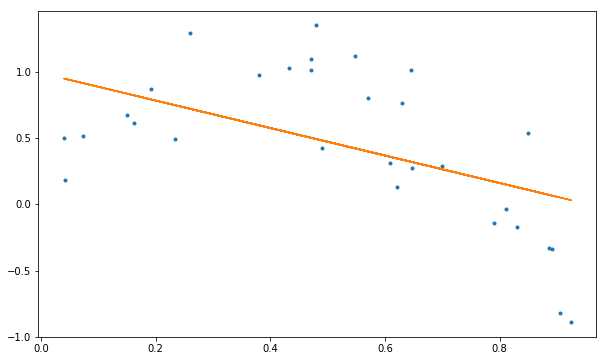

In [10]:
y_pred = np.dot(X_ones, theta[-1])
plt.figure(figsize=(10,6))
plt.plot(X1, y1, '.')
plt.plot(X1, y_pred, '-')
plt.show()

### 1.2)  2nd Order Polynomial regression

In [15]:
#generating 2nd order polynomial 
data1 = pd.read_csv('ex2data1.csv')
data1 = data1.sort_values('x')
data1["x1"] = data1["x"]
data1["x2"] = (data1["x"]**2) #2nd order polynomial
data1 = data1.drop(["x"],axis=1) 
columns= data1.shape[1]
y = data1.iloc[:,0] 
X1= data1.iloc[:,1:columns]  #generating polynomial
y_norm = y #normalization of features
X1_norm = (X1 - mean(X1, axis= 0))/ std(X1, axis= 0)    

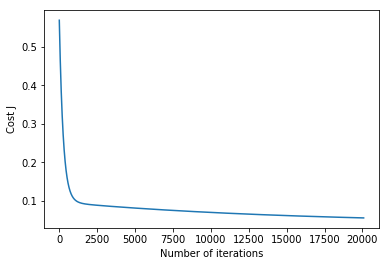

In [16]:
#using the gradient_descent function from above 
X_ones = np.c_[np.ones(X1_norm.shape[0]), X1_norm]
theta_iters = [ 0 ,0,0]  + np.random.rand(1)
theta, y_preds, iterations, cost,alpha = gradient_descent(X_ones, y, theta_iters, alpha = 0.001,precision = 0.000001 )
plt.plot(range(len(cost)), cost)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [17]:
rmse = math.sqrt(cost[-1])
print("RMSE = ", rmse)
print("Cost = ", cost[-1])
print("Optimized weights:- w0 =", theta[-1][0], ", w1 =", theta[-1][1], "w2 =", theta[-1][2])

('RMSE = ', 0.23729875292195524)
('Cost = ', 0.05631069813831516)
('Optimized weights:- w0 =', 0.4526915091373808, ', w1 =', 0.44419911507930065, 'w2 =', -0.8192033113884732)


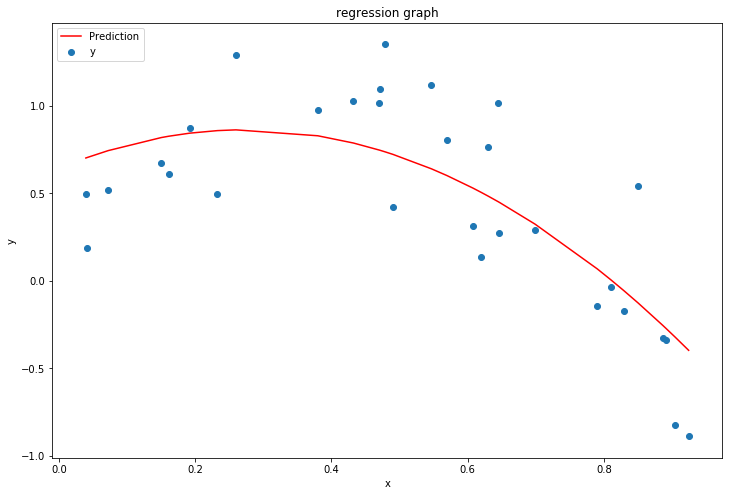

In [18]:
y_pred = np.dot(X_ones, theta[-1])
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(data1["x1"], y_pred, 'r', label='Prediction')   
ax.scatter(data1["x1"], y)
ax.legend(loc=2)  
ax.set_xlabel('x')  
ax.set_ylabel('y')  
ax.set_title('regression graph')  
plt.show()

### 4th order polynomial regression ###

In [19]:
#generating 4th order polynomial 
data1 = pd.read_csv('ex2data1.csv')
data1 = data1.sort_values('x')
data1["x1"] = data1["x"]
data1["x2"] = pow(data1["x"],2) 
data1["x3"] = pow(data1["x"],3) 
data1["x4"] = pow(data1["x"],4)  
data1 = data1.drop(["x"],axis=1) 

In [21]:
columns= data1.shape[1]
y = data1.iloc[:,0] 
X1= data1.iloc[:,1:columns]  #generating polynomial
y_norm = y #normalization of features
X1_norm = (X1 - mean(X1, axis= 0))/ std(X1, axis= 0)    

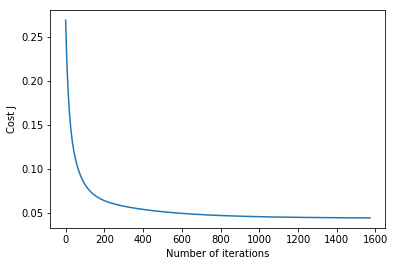

In [22]:
#using the gradient_descent function from above 
X_ones = np.c_[np.ones(X1_norm.shape[0]), X1_norm] #using X_norm

theta_iters = np.array([0.,0.,0.,0.,0.])
theta, y_preds, iterations, cost, alpha = gradient_descent(X_ones, y, theta_iters, alpha = 0.01,precision = 0.000001, )
plt.plot(range(len(cost)), cost)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [23]:
rmse = math.sqrt(cost[-1])
print("RMSE = ", rmse)
print("Cost = ", cost[-1])
print("Optimized weights:- w0 =", theta[-1][0], ", w1 =", theta[-1][1], "w2 =", theta[-1][2])

('RMSE = ', 0.21110318131672973)
('Cost = ', 0.044564553162044065)
('Optimized weights:- w0 =', 0.45269144715625115, ', w1 =', 0.3734905701998442, 'w2 =', -0.07860629445077895)


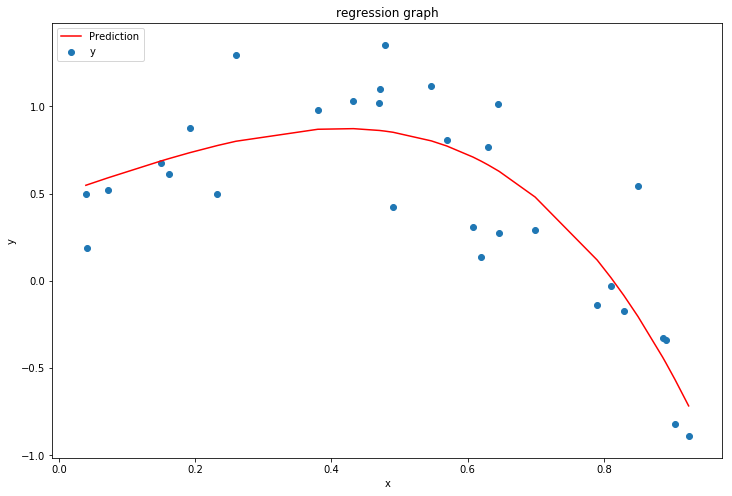

In [24]:
y_pred = np.dot(X_ones, theta[-1])
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(data1["x1"], y_pred, 'r', label='Prediction')   
ax.scatter(data1["x1"], y)
ax.legend(loc=2)  
ax.set_xlabel('x')  
ax.set_ylabel('y')  
ax.set_title('regression graph')  
plt.show()

### 16th order polynomial regression ###

In [14]:
def sixteenth_order_1(data1):
    data1 = data1.sort_values('x')
    data1["x1"] = data1["x"]
    data1["x2"] = pow(data1["x"],2) 
    data1["x3"] = pow(data1["x"],3) 
    data1["x4"] = pow(data1["x"],4)
    data1["x5"] = pow(data1["x"],5) 
    data1["x6"] = pow(data1["x"],6) 
    data1["x7"] = pow(data1["x"],7) 
    data1["x8"] = pow(data1["x"],8) 
    data1["x9"] = pow(data1["x"],9) 
    data1["x10"] = pow(data1["x"],10) 
    data1["x11"] = pow(data1["x"],11) 
    data1["x12"] = pow(data1["x"],12) 
    data1["x13"] = pow(data1["x"],13) 
    data1["x14"] = pow(data1["x"],14) 
    data1["x15"] = pow(data1["x"],15) 
    data1["x16"] = pow(data1["x"],16)   #generating 16th order polynomial 

    data1 = data1.drop(["x"],axis=1)
    columns= data1.shape[1]
    y = data1.iloc[:,0] 
    X= data1.iloc[:,1:columns]  #generating polynomial
    return data1, X, y

In [30]:
data1 = pd.read_csv('ex2data1.csv')
data1, X, y = sixteenth_order_1(data1)
y_norm = y #normalization of features
X_norm = (X - mean(X, axis= 0))/ std(X, axis= 0)          

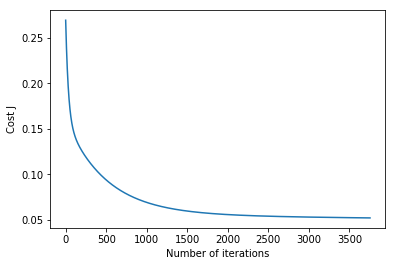

In [31]:
#using the gradient_descent function from above 
X_ones = np.c_[np.ones(X_norm.shape[0]), X_norm] #using X_norm adding ones column
theta_iters = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.] )  #creating a numpy array 
theta, y_preds, iterations, cost, alpha = gradient_descent(X_ones, y, theta_iters, alpha = 0.001,precision = 0.000001, )
plt.plot(range(len(cost)), cost)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [32]:
rmse = math.sqrt(cost[-1])
print("RMSE = ", rmse)
print("Cost = ", cost[-1])
print("Optimized weights:- w0 =", theta[-1][0], ", w1 =", theta[-1][1] ,", w2 =", theta[-1][2] ,", w3 =", theta[-1][3] ,", w4 =", theta[-1][4],", w5 =", theta[-1][5],", w6 =", theta[-1][6],", w7 =", theta[-1][7],", w8 =", theta[-1][8],", w9 =", theta[-1][9],", w10 =", theta[-1][10],", w11 =", theta[-1][11],", w12 =", theta[-1][12],", w13 =", theta[-1][13],", w14 =", theta[-1][14],", w15 =", theta[-1][15],", w16 =", theta[-1][16])

('RMSE = ', 0.22867069766051668)
('Cost = ', 0.05229028796854743)
('Optimized weights:- w0 =', 0.4421182074163929, ', w1 =', 0.08159568697067872, ', w2 =', -0.02641045950069706, ', w3 =', -0.06552109339439958, ', w4 =', -0.07310544774222781, ', w5 =', -0.06816587380019437, ', w6 =', -0.0590841541520447, ', w7 =', -0.049436528263218996, ', w8 =', -0.040665309980511946, ', w9 =', -0.033260052222862026, ', w10 =', -0.027290141134064444, ', w11 =', -0.022649843202370644, ', w12 =', -0.01917158041745424, ', w13 =', -0.01667725831819307, ', w14 =', -0.015000129687670663, ', w15 =', -0.01399271702345159, ', w16 =', -0.01352832135016531)


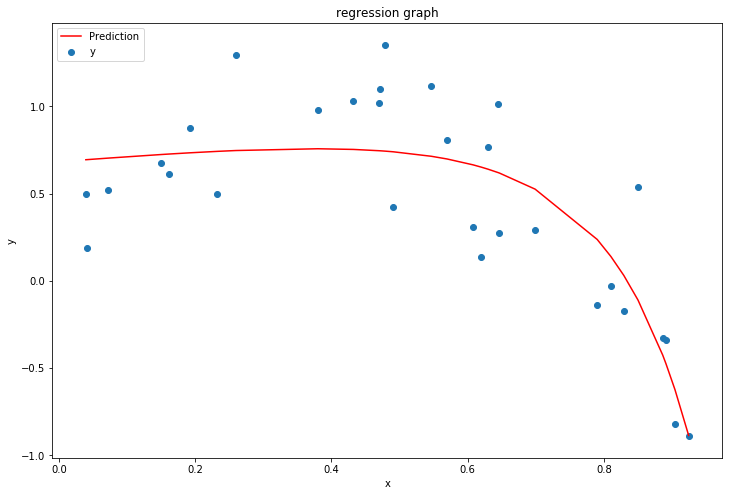

In [33]:
y_pred = np.dot(X_ones, theta[-1])
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(data1["x1"], y_pred, 'r', label='Prediction')   
ax.scatter(data1["x1"], y)
ax.legend(loc=2)  
ax.set_xlabel('x')  
ax.set_ylabel('y')  
ax.set_title('regression graph')  
plt.show()

### 16th order polynomial regression model with ridge (L2 penalty) regularization ###

In [48]:
#generalized gradient descent function for polynomial regression with ridge (L2 penalty) regularization
def gradient_descent_regularization(x, y, theta, alpha, scale,  precision, max_alpha=0, max_iteration= 50000 ):
    
    m = len(y) 
    theta_history = [] 
    y_preds = []
    costs = []
    y_pred = np.dot(x, theta)
    error = y_pred - y 
    old_cost = 0
    base = np.sum(error ** 2) / ( m)
    reg_error = np.sum(theta **2) /( m) #  L2 regularization
    new_cost = base + scale* reg_error 
    costs.append(new_cost)
    
    
    y_preds.append(y_pred)
    
    theta_history.append(theta)
    iters = 0 # setting iterations to 0
    iters = iters + 1
    while abs(new_cost - old_cost) >= precision: # for optimization
        
        old_cost = new_cost #precision 
        gradient = 2*(x.T.dot(error))/m 
        theta = theta - alpha * (gradient + (scale/m)*theta)  #updating weight with regularization
        theta_history.append(theta) #storing histoy of weights
        y_pred = np.dot(x, theta)
        error = y_pred - y 
        base = np.sum(error ** 2) / (2 * m)
        reg_error = np.sum(theta **2) /(2 * m)
        new_cost = base + scale* reg_error 
        costs.append(new_cost)
        y_preds.append(y_pred)
        iters = iters + 1
        
        if iters > max_iteration:
            print("Exceeded maximum iterations")
            break
        
    return theta_history, y_preds, iters, costs, alpha

In [49]:
def rmse( true_value, predicted_value):
    rmse = np.sqrt(sum((predicted_value - true_value) ** 2) / len(true_value))
    return rmse

In [54]:
data1 = pd.read_csv('ex2data1.csv')
data1, X, y = sixteenth_order_1(data1)
y_norm = y #normalization of features
X_norm = (X - mean(X, axis= 0))/ std(X, axis= 0)    

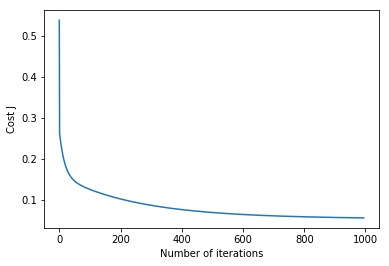

In [55]:
X_ones = np.c_[np.ones(X_norm.shape[0]), X_norm] #using X_norm adding ones column
theta_iters = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.] )  #creating a numpy array 
theta, y_preds, iterations, cost, alpha = gradient_descent_regularization(X_ones, y, theta_iters, alpha = 0.001, scale = 0.1, precision = 0.00001,)
plt.plot(range(len(cost)), cost)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [56]:
y_pred = np.dot(X_ones, theta[-1])
rmse = rmse(y_pred, y)
print("RMSE = ", rmse)
#print("Cost = ", cost[-1])
print("Optimized weights:- w0 =", theta[-1][0], ", w1 =", theta[-1][1] ,", w2 =", theta[-1][2] ,", w3 =", theta[-1][3] ,", w4 =", theta[-1][4],", w5 =", theta[-1][5],", w6 =", theta[-1][6],", w7 =", theta[-1][7],", w8 =", theta[-1][8],", w9 =", theta[-1][9],", w10 =", theta[-1][10],", w11 =", theta[-1][11],", w12 =", theta[-1][12],", w13 =", theta[-1][13],", w14 =", theta[-1][14],", w15 =", theta[-1][15],", w16 =", theta[-1][16])

('RMSE = ', 0.334742812509101)
('Optimized weights:- w0 =', 0.39036456943918835, ', w1 =', 0.03943467856798941, ', w2 =', -0.023509131690423343, ', w3 =', -0.04755013757745632, ', w4 =', -0.053381651627106966, ', w5 =', -0.05171381378879347, ', w6 =', -0.047351532551149884, ', w7 =', -0.04239190050740256, ', w8 =', -0.03771468504169032, ', w9 =', -0.03364786413418936, ', w10 =', -0.03027046672386296, ', w11 =', -0.027553401828838503, ', w12 =', -0.025425526410108635, ', w13 =', -0.02380429100853112, ', w14 =', -0.022609364583923475, ', w15 =', -0.021768084913568138, ', w16 =', -0.021217055856085066)


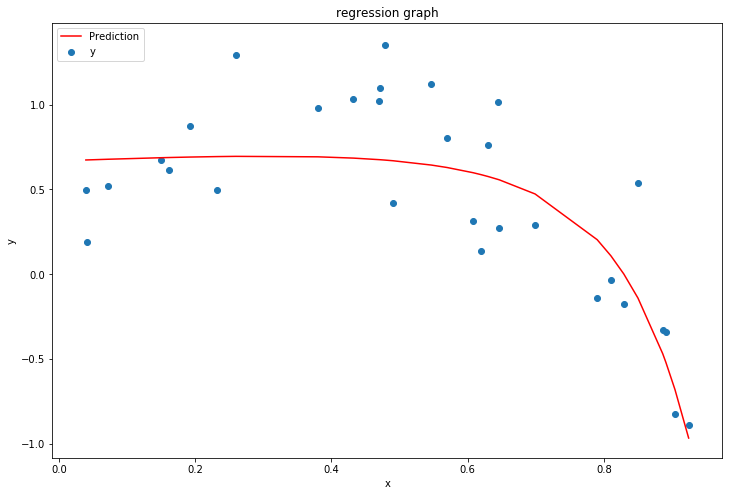

In [57]:
y_pred = np.dot(X_ones, theta[-1])
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(data1["x1"], y_pred, 'r', label='Prediction')   
ax.scatter(data1["x1"], y)
ax.legend(loc=2)  
ax.set_xlabel('x')  
ax.set_ylabel('y')  
ax.set_title('regression graph')  
plt.show()

### 16th order polynomial regression model with scikit-learn Ridge model ###

In [7]:
#generating 16th order polynomial 
data1 = pd.read_csv('ex2data1.csv')
data1 = data1.sort_values('x')

data1["x1"] = data1["x"]
data1["x2"] = pow(data1["x"],2) 
data1["x3"] = pow(data1["x"],3) 
data1["x4"] = pow(data1["x"],4)
data1["x5"] = pow(data1["x"],5) 
data1["x6"] = pow(data1["x"],6) 
data1["x7"] = pow(data1["x"],7) 
data1["x8"] = pow(data1["x"],8) 
data1["x9"] = pow(data1["x"],9) 
data1["x10"] = pow(data1["x"],10) 
data1["x11"] = pow(data1["x"],11) 
data1["x12"] = pow(data1["x"],12) 
data1["x13"] = pow(data1["x"],13) 
data1["x14"] = pow(data1["x"],14) 
data1["x15"] = pow(data1["x"],15) 
data1["x16"] = pow(data1["x"],16) 

data1 = data1.drop(["x"],axis=1)
columns= data1.shape[1]
y = data1.iloc[:,0] 
X1= data1.iloc[:,1:columns]  #generating polynomial

X1_norm = (X1 - mean(X1, axis= 0))/ std(X1, axis= 0)        #normalization of features

In [8]:
def rmse( true_value, predicted_value):
    rmse = 0.0
    rmse = np.sqrt(sum((predicted_value - true_value) ** 2) / len(true_value))
    return rmse

In [9]:
def ridge_model(l,X_train, y_train):
    clf = Ridge(l)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    rmse = 0.0
    rmse = rmse(y, y_pred)
    return rmse

In [10]:
X_train, X_test = X1_norm, X1_norm
y_train, y_test = y, y


In [11]:
# lambda = 0.1 gives the lease RMSE
l = 0.1
clf = Ridge(l)
clf.fit(X_train, y_train)
weights = clf.coef_
print("Optimized weights =", weights, "when lambda =", l)

('Optimized weights =', array([ 0.78485691, -0.41980483, -0.6474652 , -0.48475686, -0.22708056,
        0.00646183,  0.17607267,  0.27503508,  0.30951311,  0.28986803,
        0.22699526,  0.13087521,  0.01010497, -0.12814542, -0.27800671,
       -0.43473061]), 'when lambda =', 0.1)


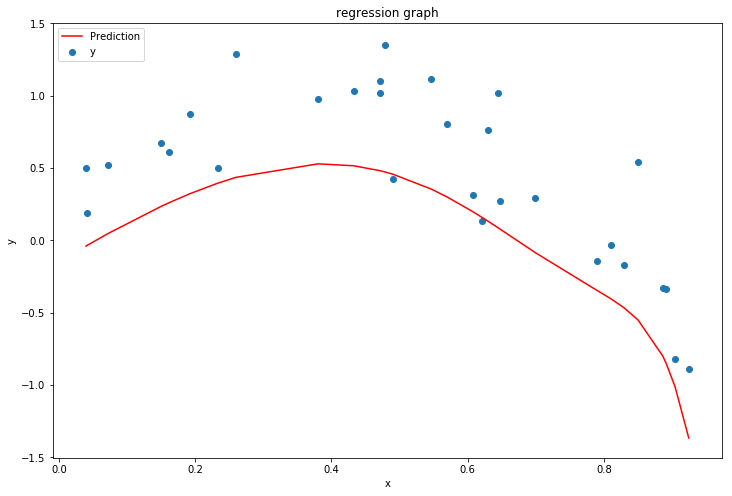

In [12]:
y_pred = np.dot(X1_norm, weights)
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(data1["x1"], y_pred, 'r', label='Prediction')   
ax.scatter(data1["x1"], y)
ax.legend(loc=2)  
ax.set_xlabel('x')  
ax.set_ylabel('y')  
ax.set_title('regression graph')  
plt.show()

### 16th order polynomial regression model with scikit-learn Lasso model ###

In [15]:
data1 = pd.read_csv('ex2data1.csv')
data1, X, y = sixteenth_order_1(data1)

In [76]:
X_norm = (X - mean(X, axis=0))/ std(X, axis = 0)  #normalization of features

In [77]:
def rmse( true_value, predicted_value):
    rmse = np.sqrt(sum((predicted_value - true_value) ** 2) / len(true_value))
    return rmse

In [78]:
X_train, X_test = X_norm, X_norm
y_train, y_test = y, y

l= 0.1
clf = Lasso(l)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse1 = rmse(y, y_pred)
print("RMSE ", rmse1 , " with test data when lambda =",l)

('RMSE ', 0.34466712593964577, ' with test data when lambda =', 0.1)


In [79]:
l= 1
clf = Ridge(l)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse1 = rmse(y, y_pred)
print("RMSE ", rmse1 , " with test data when lambda =",l)

('RMSE ', 0.3015546921663989, ' with test data when lambda =', 1)


In [80]:
l= 10
clf = Ridge(l)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse1 = rmse(y, y_pred)
print("RMSE ", rmse1 , " with test data when lambda =",l)

('RMSE ', 0.32670447433183286, ' with test data when lambda =', 10)


In [81]:
# lambda = 1 gives least RMSE
l = 1
clf = Lasso(l)
clf.fit(X_train, y_train)
weights = clf.coef_
print("Optimized weights =", weights, "when lambda =", l)

('Optimized weights =', array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0.]), 'when lambda =', 1)


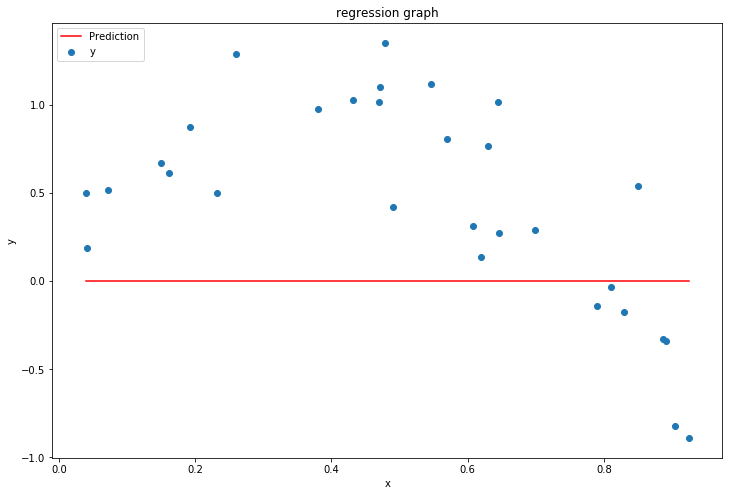

In [83]:
y_pred = np.dot(X_norm, weights)
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(data1["x1"], y_pred, 'r', label='Prediction')   
ax.scatter(data1["x1"], y)
ax.legend(loc=2)  
ax.set_xlabel('x')  
ax.set_ylabel('y')  
ax.set_title('regression graph')  
plt.show()

### 2 . Polynomial regression with train/validation/test ###

In [2]:
def split_train_test_data(X, test_ratio): #splitting data
    np.random.seed(1) #setting random seed 1
    shuffled_indices = np.random.permutation(len(X))
    test_set_size = int(len(X)* test_ratio)
    test_indices = shuffled_indices[: test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return X.iloc[train_indices], X.iloc[test_indices]

In [3]:
def normalization(X_train, y_train, X, y):  #normalization
    X_norm = (X - X_train.mean())/ X_train.std()
    y_norm = y
    return X_norm, y_norm

In [4]:
def complete_split_norm_data(data): # returning normalizes test, validation and training data
    train, test = split_train_test_data(data, 0.2)
    train, validate = split_train_test_data(train, 0.25)
    train = train.sort_values('x1')
    test = test.sort_values('x1')
    validate = validate.sort_values('x1')
    column = train.shape[1]
    X_train= train.iloc[:,0:column-1]
    y_train= train.iloc[:,-1]
    X_val = validate.iloc[:,0:column-1]
    y_val= validate.iloc[:,-1]
    X_test= test.iloc[:,0:column-1]
    y_test= test.iloc[:,-1]
    X_test_norm, y_test = normalization(X_train, y_train, X_test, y_test)
    X_val_norm, y_val= normalization(X_train, y_train, X_val, y_val)
    X_train_norm, y_train = normalization(X_train, y_train, X_train, y_train)
    return X_train_norm, y_train, X_test_norm, y_test, X_val_norm, y_val

In [5]:
#generalized gradient descent function for polynomial regression
def gradient_descent(x, y, theta, alpha,precision, max_alpha=0, max_iteration= 100000 ):
    
    m = len(y) 
    theta_history = [] 
    y_preds = []
    costs = []
    y_pred = np.dot(x, theta)
    error = y_pred - y 
    old_cost = 0
    new_cost = np.sum(error ** 2) / (2 * m)
    costs.append(new_cost)
    
    y_preds.append(y_pred)
    
    theta_history.append(theta)
    iters = 0 # setting iterations to 0
    iters = iters + 1
    while abs(new_cost - old_cost) > precision: # for optimization
        
        old_cost = new_cost #precision 
        gradient = x.T.dot(error)/m 
        theta = theta - alpha * gradient  #updating weight
        theta_history.append(theta) #storing histoy of weights
        y_pred = np.dot(x, theta)
        error = y_pred - y 
        new_cost = np.sum(error ** 2)/(2 * m)
        costs.append(new_cost)
        y_preds.append(y_pred)
        iters = iters + 1
        
        if iters > max_iteration:
            print("Exceeded maximum iterations")
            break
            
    return theta_history, y_preds, iters, costs, alpha

### 2.1 ###

In [88]:
data2 = pd.read_csv('ex2data2.csv')
data2["x1"] = data2["sqft_living"]
data2["y"] = data2["price"]
data2 = data2.drop(["sqft_living","price"],axis=1) 
X = data2["x1"]
y = data2["y"]
X2_train, y2_train, X2_test, y2_test, X2_val, y2_val = complete_split_norm_data(data2)

('RMSE = ', 190827.9949457282)
('Optimized weights:- w0 =', 548820.3690944654, ', w1 =', 288543.7456955846)


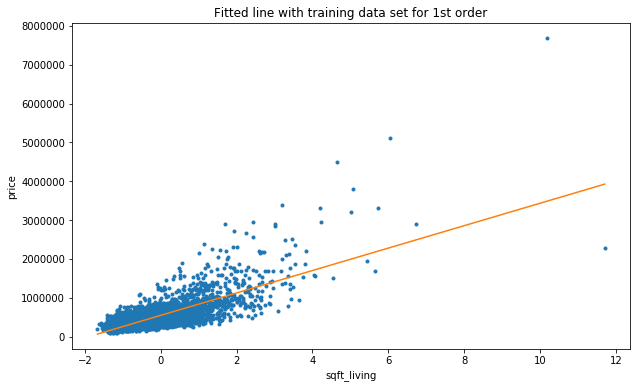

In [89]:
#using the gradient_descent function from above and traning data
X_ones = np.c_[np.ones(X2_train.shape[0]), X2_train]
theta_iters = np.array([0.,0.])  
theta, y_preds, iterations, cost,alpha = gradient_descent(X_ones, y2_train, theta_iters, alpha = 0.001,precision = 0.000001 )
rmse = math.sqrt(cost[-1])
print("RMSE = ", rmse)
print("Optimized weights:- w0 =", theta[-1][0], ", w1 =", theta[-1][1])
y_pred = np.dot(X_ones, theta[-1])
plt.figure(figsize=(10,6))
plt.plot(X2_train, y2_train, '.')
plt.plot(X2_train, y_pred, '-')
plt.title('Fitted line with training data set for 1st order')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [90]:
#testing data
X_ones = np.c_[np.ones(X2_test.shape[0]), X2_test]
y_preds = np.dot(X_ones, theta[-1])
rmse_test = mean_squared_error(y_preds, y2_test)
print("RMSE of test data = ", rmse_test)

('RMSE of test data = ', 69687446553.85439)


### 2.2 ###

In [91]:
#generating 2nd order polynomial 
data2 = pd.read_csv('ex2data2.csv')
data2 = data2.sort_values('sqft_living')
# X = data2["sqft_living"]
# y = data2["price"]
data2["x1"] = data2["sqft_living"]
data2["x2"] = (data2["sqft_living"]**2) #2nd order polynomial
data2["y"] = data2["price"]
data2 = data2.drop(["sqft_living","price"],axis=1) 
columns= data2.shape[1]
X = data2.iloc[:,:-1] 
y= data2.iloc[:,columns-1:columns]  #generating polynomial

#getting all split and normalized data

In [92]:
X2_train, y2_train, X2_test, y2_test, X2_val, y2_val = complete_split_norm_data(data2) 

('RMSE = ', 184130.70974255438)
('Optimized weights:- w0 =', 542476.5334566178, ', w1 =', 150303.5731163002, ', w2 =', 151431.01540789945)


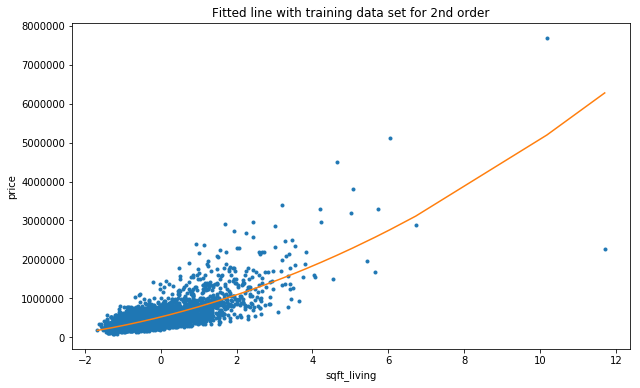

In [93]:
#using the gradient_descent function from above and traning data
X_ones = np.c_[np.ones(X2_train.shape[0]), X2_train]
theta_iters = np.array([0.,0.,0.])  
theta, y_preds, iterations, cost,alpha = gradient_descent(X_ones, y2_train, theta_iters, alpha = 0.001,precision = 0.00001 )
rmse = math.sqrt(cost[-1])
print("RMSE = ", rmse)
print("Optimized weights:- w0 =", theta[-1][0], ", w1 =", theta[-1][1], ", w2 =", theta[-1][2])
y_pred = np.dot(X_ones, theta[-1])
plt.figure(figsize=(10,6))
plt.plot(X2_train["x1"], y2_train, '.')
plt.plot(X2_train["x1"], y_pred, '-')
plt.title('Fitted line with training data set for 2nd order')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [94]:
#testing data
X_ones = np.c_[np.ones(X2_test.shape[0]), X2_test]
y_preds = np.dot(X_ones, theta[-1])
rmse_test = mean_squared_error(y_preds, y2_test)
print("RMSE of test data = ", rmse_test)

('RMSE of test data = ', 67019123235.078964)


### 2.3 ###

In [95]:
#generating 4th order polynomial 
data2 = pd.read_csv('ex2data2.csv')
data2 = data2.sort_values('sqft_living')
data2["x1"] = data2["sqft_living"]
data2["x2"] = (data2["sqft_living"]**2) 
data2["x3"] = (data2["sqft_living"]**3)
data2["x4"] = (data2["sqft_living"]**4) #4th order polynomial
data2["y"] = data2["price"]
data2 = data2.drop(["sqft_living","price"],axis=1) 
columns= data2.shape[1]
X = data2.iloc[:,:-1] 
y= data2.iloc[:,columns-1:columns]  #generating polynomial

#getting all split and normalized data
X2_train, y2_train, X2_test, y2_test, X2_val, y2_val = complete_split_norm_data(data2) 

Exceeded maximum iterations
('RMSE = ', 176300.56177790737)
('Optimized weights:- w0 =', 542476.5334566702, ', w1 =', 16312.9049500444, ', w2 =', 177421.95545801558, ', w3 =', 485838.6413102574, ', w4 =', -453286.93083246314)


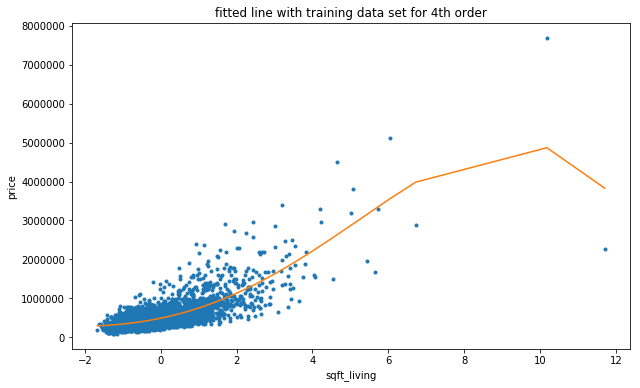

In [96]:
#using the gradient_descent function from above and traning data
X_ones = np.c_[np.ones(X2_train.shape[0]), X2_train]
theta_iters = np.array([0.,0.,0.,0.,0.])  
theta, y_preds, iterations, cost,alpha = gradient_descent(X_ones, y2_train, theta_iters, alpha = 0.01,precision = 0.001 )
rmse = math.sqrt(cost[-1])
print("RMSE = ", rmse)
print("Optimized weights:- w0 =", theta[-1][0], ", w1 =", theta[-1][1] ,", w2 =", theta[-1][2] ,", w3 =", theta[-1][3] ,", w4 =", theta[-1][4])
y_pred = np.dot(X_ones, theta[-1])
plt.figure(figsize=(10,6))
plt.plot(X2_train["x1"], y2_train, '.')
plt.plot(X2_train["x1"], y_pred, '-')
plt.title('fitted line with training data set for 4th order')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [97]:
#testing data
X_ones = np.c_[np.ones(X2_test.shape[0]), X2_test]
y_preds = np.dot(X_ones, theta[-1])
rmse_test = mean_squared_error(y_preds, y2_test)
print "RMSE of test data = ", rmse_test

RMSE of test data =  65211699856.35246


### 2.4

In [98]:
def sixteenth_order_2(data2):
      #generating 16th order polynomial 
    data2 = data2.sort_values('sqft_living')
    data2["x1"] = data2["sqft_living"]
    data2["x2"] = (data2["sqft_living"]**2) 
    data2["x3"] = (data2["sqft_living"]**3)
    data2["x4"] = (data2["sqft_living"]**4) 
    data2["x5"] = (data2["sqft_living"]**5)
    data2["x6"] = (data2["sqft_living"]**6)
    data2["x7"] = (data2["sqft_living"]**7)
    data2["x8"] = (data2["sqft_living"]**8)
    data2["x9"] = (data2["sqft_living"]**9)
    data2["x10"] = (data2["sqft_living"]**10)
    data2["x11"] = (data2["sqft_living"]**11)
    data2["x12"] = (data2["sqft_living"]**12)
    data2["x13"] = (data2["sqft_living"]**13)
    data2["x14"] = (data2["sqft_living"]**14)
    data2["x15"] = (data2["sqft_living"]**15)
    data2["x16"] = (data2["sqft_living"]**16) #16th order polynomial
    data2["y"] = data2["price"]
    data2 = data2.drop(["sqft_living","price"],axis=1) 
    columns= data2.shape[1]
    X = data2.iloc[:,:-1] 
    y= data2.iloc[:,columns-1:columns]  #generating polynomial
    return data2, X, y

data2 = pd.read_csv('ex2data2.csv') 
data2, X, y = sixteenth_order_2(data2)
#getting all split and normalized data
X2_train, y2_train, X2_test, y2_test, X2_val, y2_val = complete_split_norm_data(data2) 

In [99]:
def rmse( true_value, predicted_value):
    rmse = np.sqrt(sum((predicted_value - true_value) ** 2) / len(true_value))
    return rmse

Exceeded maximum iterations
('RMSE = ', 174726.39838742506)
('Optimized weights:- w0 =', 542476.5334566702, ', w1 =', -39913.66534301814, ', w2 =', 323626.17468839366, ', w3 =', 403758.2419647447, ', w4 =', -463151.7910892162, ', w5 =', -41740.67824355487, ', w6 =', -5179.224037163746, ', w7 =', -1659.4902468425646, ', w8 =', 1750.9260255379306, ', w9 =', -31.2138524974354, ', w10 =', -8409.724181902408, ', w11 =', -29.544993030313325, ', w12 =', 8942.95199768908, ', w13 =', 758.9216228312574, ', w14 =', -26.613897146364096, ', w15 =', 209.99343055986742, ', w16 =', 1932.6662414689572)


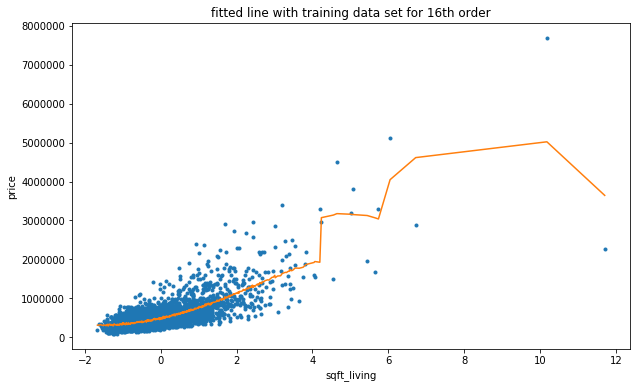

In [100]:
#using the gradient_descent function from above and traning data
X_ones = np.c_[np.ones(X2_train.shape[0]), X2_train]
theta_iters = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])  
theta, y_preds, iterations, cost,alpha = gradient_descent(X_ones, y2_train, theta_iters, alpha = 0.01,precision = 0.001 )
rmse = math.sqrt(cost[-1])
print("RMSE = ", rmse)
print("Optimized weights:- w0 =", theta[-1][0], ", w1 =", theta[-1][1] ,", w2 =", theta[-1][2] ,", w3 =", theta[-1][3] ,", w4 =", theta[-1][4],", w5 =", theta[-1][5],", w6 =", theta[-1][6],", w7 =", theta[-1][7],", w8 =", theta[-1][8],", w9 =", theta[-1][9],", w10 =", theta[-1][10],", w11 =", theta[-1][11],", w12 =", theta[-1][12],", w13 =", theta[-1][13],", w14 =", theta[-1][14],", w15 =", theta[-1][15],", w16 =", theta[-1][16])
y_pred = np.dot(X_ones, theta[-1])
plt.figure(figsize=(10,6))
plt.plot(X2_train["x1"], y2_train, '.')
plt.plot(X2_train["x1"], y_pred, '-')
plt.title('fitted line with training data set for 16th order')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [101]:
#testing data
X_ones = np.c_[np.ones(X2_test.shape[0]), X2_test]
y_preds = np.dot(X_ones, theta[-1])
rmse_test = mean_squared_error(y_preds, y2_test)
print "RMSE of test data = ", rmse_test


RMSE of test data =  67899856412.47377


### 2.5:  L2 norm using gradient descent function

In [102]:
data2 = pd.read_csv('ex2data2.csv') 
data2, X, y = sixteenth_order_2(data2)
#getting all split and normalized data
X2_train, y2_train, X2_test, y2_test, X2_val, y2_val = complete_split_norm_data(data2) 

In [103]:
def rmse( true_value, predicted_value):
    rmse = np.sqrt(sum((predicted_value - true_value) ** 2) / len(true_value))
    return rmse

In [104]:
scale = [0.1, 1, 100]
for s in scale:
    
    X_ones = np.c_[np.ones(X2_train.shape[0]), X2_train] #using X_norm adding ones column
    theta_iters = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.] )  #creating a numpy array 
    theta, y_preds, iterations, cost, alpha = gradient_descent_regularization(X_ones, y2_train, theta_iters, alpha = 0.01, scale = s, precision = 0.001,)
    X_ones = np.c_[np.ones(X2_val.shape[0]), X2_val]
    y_preds = np.dot(X_ones, theta[-1])
    rmse_val = rmse(y_preds, y2_val)
    print "RMSE of validation data when scale is ", s, "= ", rmse_val 

Exceeded maximum iterations
RMSE of validation data when scale is  0.1 =  274229.0805990281
Exceeded maximum iterations
RMSE of validation data when scale is  1 =  274255.526062527
Exceeded maximum iterations
RMSE of validation data when scale is  100 =  274255.526062527


Exceeded maximum iterations
('Optimized weights:- w0 =', 542468.1697784466, ', w1 =', -40052.34879080296, ', w2 =', 324412.77460443537, ', w3 =', 402133.5289934796, ', w4 =', -462113.11767456663, ', w5 =', -41715.0701383463, ', w6 =', -5177.25533539574, ', w7 =', -1657.3322275222013, ', w8 =', 1749.766870132771, ', w9 =', -32.47637191506167, ', w10 =', -8407.358150611153, ', w11 =', -27.399497984072937, ', w12 =', 8944.914465456586, ', w13 =', 759.9375164503739, ', w14 =', -25.981343574299864, ', w15 =', 211.31486629695303, ', w16 =', 1934.3495544558466)


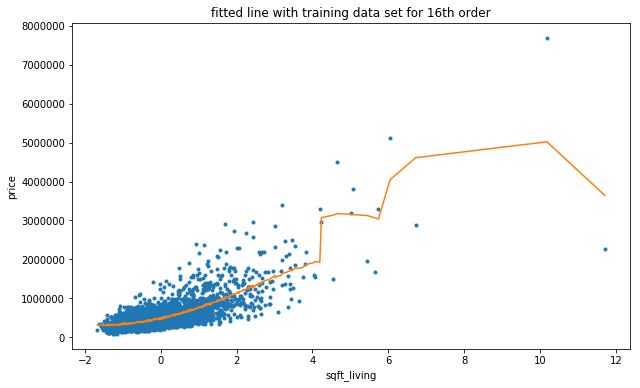

In [105]:
X_ones = np.c_[np.ones(X2_train.shape[0]), X2_train] #using X_norm adding ones column
theta_iters = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.] )  #creating a numpy array 
theta, y_preds, iterations, cost, alpha = gradient_descent_regularization(X_ones, y2_train, theta_iters, alpha = 0.01, scale = 0.1, precision = 0.001,)
print("Optimized weights:- w0 =", theta[-1][0], ", w1 =", theta[-1][1] ,", w2 =", theta[-1][2] ,", w3 =", theta[-1][3] ,", w4 =", theta[-1][4],", w5 =", theta[-1][5],", w6 =", theta[-1][6],", w7 =", theta[-1][7],", w8 =", theta[-1][8],", w9 =", theta[-1][9],", w10 =", theta[-1][10],", w11 =", theta[-1][11],", w12 =", theta[-1][12],", w13 =", theta[-1][13],", w14 =", theta[-1][14],", w15 =", theta[-1][15],", w16 =", theta[-1][16])
y_pred = np.dot(X_ones, theta[-1])
plt.figure(figsize=(10,6))
plt.plot(X2_train["x1"], y2_train, '.')
plt.plot(X2_train["x1"], y_pred, '-')
plt.title('fitted line with training data set for 16th order')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

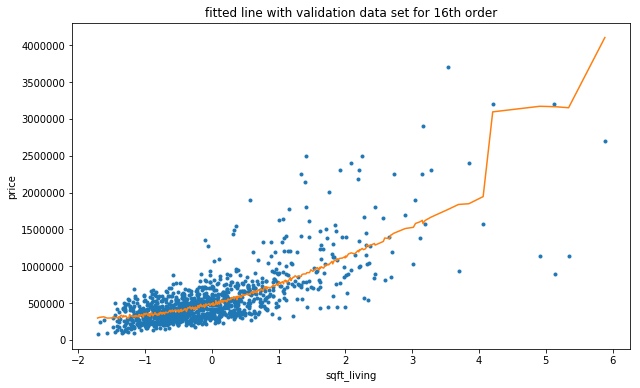

In [106]:
X_ones = np.c_[np.ones(X2_val.shape[0]), X2_val]
y_preds = np.dot(X_ones, theta[-1])
y_pred = np.dot(X_ones, theta[-1])
plt.figure(figsize=(10,6))
plt.plot(X2_val["x1"], y2_val, '.')
plt.plot(X2_val["x1"], y_pred, '-')
plt.title('fitted line with validation data set for 16th order')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [107]:
#RMSE of testing/test/validation data
X_ones = np.c_[np.ones(X2_test.shape[0]), X2_test]
y_preds = np.dot(X_ones, theta[-1])
rmse_test = rmse(y_preds, y2_test)
print "RMSE of test data = ", rmse_test
X_ones = np.c_[np.ones(X2_val.shape[0]), X2_val]
y_preds = np.dot(X_ones, theta[-1])
rmse_val = rmse(y_preds, y2_val)
print "RMSE of validation data = ", rmse_test
X_ones = np.c_[np.ones(X2_train.shape[0]), X2_train]
y_preds = np.dot(X_ones, theta[-1])
rmse_train = rmse(y_preds, y2_train)
print "RMSE of training data = ", rmse_train

RMSE of test data =  260562.0048472287
RMSE of validation data =  260562.0048472287
RMSE of training data =  247102.42289895582


In [108]:
X_ones = np.c_[np.ones(X2_train.shape[0]), X2_train] #using X_norm adding ones column
theta_iters = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.] )  #creating a numpy array 
coefs = []
scale = np.logspace(0.1, 5.7, 20)
for s in scale:
    theta, y_preds, iterations, cost, alpha = gradient_descent_regularization(X_ones, y2_train, theta_iters, alpha = 0.01, scale = s, precision = 0.001,)
    coefs.append(theta[-1])

Exceeded maximum iterations
Exceeded maximum iterations
Exceeded maximum iterations
Exceeded maximum iterations
Exceeded maximum iterations
Exceeded maximum iterations
Exceeded maximum iterations


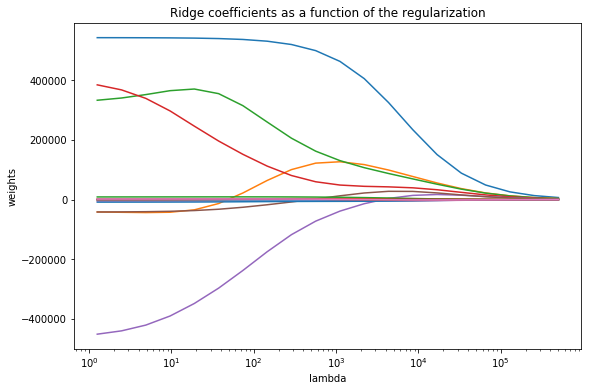

In [109]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(scale, coefs)
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

### 2.6 : L2 Norm using scikit learn ###

In [110]:
data2 = pd.read_csv('ex2data2.csv') 
data2, X, y = sixteenth_order_2(data2)
#getting all split and normalized data
X2_train, y2_train, X2_test, y2_test, X2_val, y2_val = complete_split_norm_data(data2) 

In [111]:
scale = [0.1, 1, 100]
clf = Ridge()
for s in scale:
    clf.set_params(alpha = s)
    clf.fit(X2_train, y2_train)
    y_pred = clf.predict(X2_train)
    rmse = mean_squared_error(y_pred, y2_train)
    print "RMSE when scale is ", s,"= ", rmse

RMSE when scale is  0.1 =  60834033079.070366
RMSE when scale is  1 =  60945966590.76091
RMSE when scale is  100 =  63814692414.03573


In [112]:
# scale = 0.1 has minimum RMSE
s = 0.1
clf.set_params(alpha = s)
clf.fit(X2_train, y2_train)
y_pred = clf.predict(X2_train)
rmse_train = mean_squared_error(y_pred, y2_train)
print "RMSE with training set when scale is ", s,"= ", rmse_train

y_pred = clf.predict(X2_val)
rmse_val = mean_squared_error(y_pred, y2_val)
print "RMSE with validation set when scale is ", s,"= ", rmse_val

y_pred = clf.predict(X2_test)
rmse_test = mean_squared_error(y_pred, y2_test)
print "RMSE with test set when scale is ", s,"= ", rmse_test
weights = clf.coef_
print "Weights = ", weights

RMSE with training set when scale is  0.1 =  60834033079.070366
RMSE with validation set when scale is  0.1 =  76305667777.54268
RMSE with test set when scale is  0.1 =  67882210807.084045
Weights =  [ 1.18390596e+05 -1.28484211e+05  9.95321372e+05 -7.60564650e+05
 -3.67115427e+04 -4.16883984e+03 -8.94555209e+02  1.65712673e+03
 -9.70998120e+01 -8.11510205e+03  1.38233369e+03  8.25557815e+03
  9.67242463e+02 -9.82984182e+01  8.85583332e+02  1.37971993e+03]


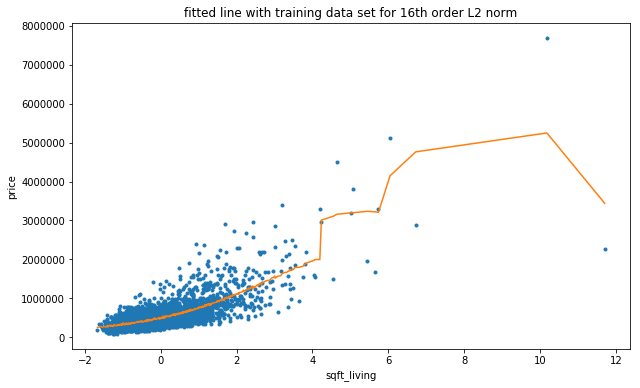

In [113]:
#fitted line
y_pred = clf.predict(X2_train)
plt.figure(figsize=(10,6))
plt.plot(X2_train["x1"], y2_train, '.')
plt.plot(X2_train["x1"], y_pred, '-')
plt.title('fitted line with training data set for 16th order L2 norm')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

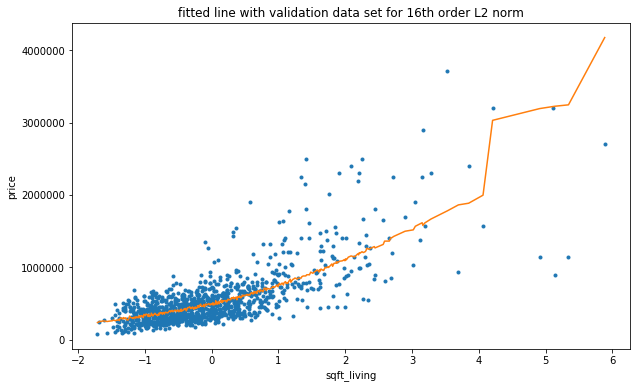

In [114]:
#fitted line
y_pred = clf.predict(X2_val)
plt.figure(figsize=(10,6))
plt.plot(X2_val["x1"], y2_val, '.')
plt.plot(X2_val["x1"], y_pred, '-')
plt.title('fitted line with validation data set for 16th order L2 norm')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

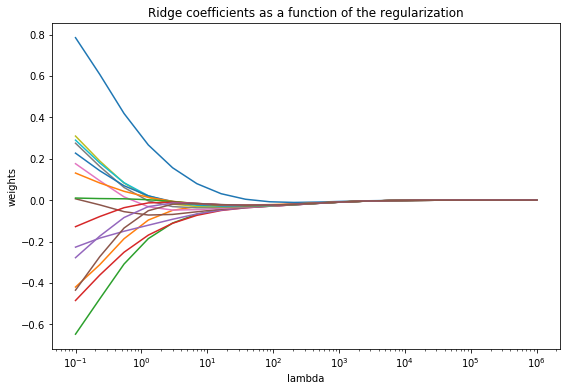

In [115]:
coefs = []
alphas = np.logspace(-1, 6, 20)
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_train, y_train)
    coefs.append(clf.coef_)

plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

### 2.7  - L1 Norm with scikit learn

In [116]:
data2 = pd.read_csv('ex2data2.csv') 
data2, X, y = sixteenth_order_2(data2)
#getting all split and normalized data
X2_train, y2_train, X2_test, y2_test, X2_val, y2_val = complete_split_norm_data(data2) 

In [117]:
scale = [0.1, 1, 100]
clf = Lasso()
for s in scale:
    clf.set_params(alpha = s)
    clf.fit(X2_train, y2_train)
    y_pred = clf.predict(X2_train)
    rmse = mean_squared_error(y_pred, y2_train)
    print "RMSE when scale is ", s,"= ", rmse

RMSE when scale is  0.1 =  61032600679.26111
RMSE when scale is  1 =  61032785823.09796
RMSE when scale is  100 =  61056480731.99303


/Users/avni/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [118]:
# scale = 0.1 has minimum RMSE
s = 0.1
clf.set_params(alpha = s)
clf.fit(X2_train, y2_train)
y_pred = clf.predict(X2_train)
rmse_train = mean_squared_error(y_pred, y2_train)
print "RMSE with training set when scale is ", s,"= ", rmse_train
clf.set_params(alpha = s)
clf.fit(X2_val, y2_val)
y_pred = clf.predict(X2_val)
rmse_val = mean_squared_error(y_pred, y2_val)
print "RMSE with validation set when scale is ", s,"= ", rmse_val
clf.set_params(alpha = s)
clf.fit(X2_test, y2_test)
y_pred = clf.predict(X2_test)
rmse_test = mean_squared_error(y_pred, y2_test)
print "RMSE with test set when scale is ", s,"= ", rmse_test
weights = clf.coef_
print "Weights = ", weights

RMSE with training set when scale is  0.1 =  61032600679.26111
RMSE with validation set when scale is  0.1 =  63947871500.903114
RMSE with test set when scale is  0.1 =  63002986625.17801
Weights =  [  68576.83828695  385363.73801967 -555122.04665958  734778.02236938
   26980.06003244    3440.89904908  -14186.03563621   -9572.46774641
  -14599.64409057     839.88575482    1227.56208593    6403.18898055
   -7480.09532429   -5674.28442098    4888.47926591   -4937.81229381]


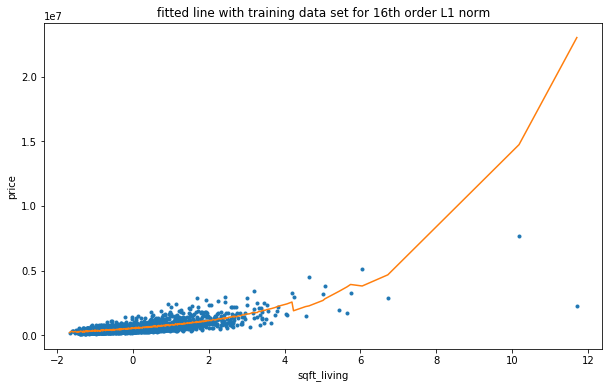

In [119]:
#fitted line
y_pred = clf.predict(X2_train)
plt.figure(figsize=(10,6))
plt.plot(X2_train["x1"], y2_train, '.')
plt.plot(X2_train["x1"], y_pred, '-')
plt.title('fitted line with training data set for 16th order L1 norm')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

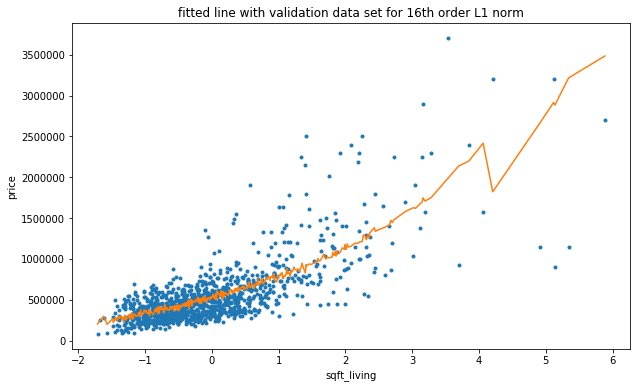

In [120]:
#fitted line
y_pred = clf.predict(X2_val)
plt.figure(figsize=(10,6))
plt.plot(X2_val["x1"], y2_val, '.')
plt.plot(X2_val["x1"], y_pred, '-')
plt.title('fitted line with validation data set for 16th order L1 norm')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

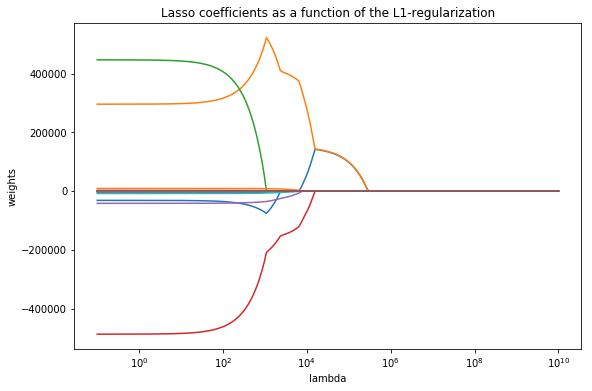

In [121]:
coefs = []
alphas = np.logspace(-1, 10, 200)
clf.set_params(alpha = 0.1)
clf.fit(X2_train, y2_train)
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X2_train, y2_train)
    coefs.append(clf.coef_)

plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the L1-regularization')
plt.show()

### 3 Regularization with Tensorflow

In [22]:
def complete_split_norm_data_3_1(data): # returning normalizes test, validation and training data
    train, test = split_train_test_data(data, 0.2)
    train, validate = split_train_test_data(train, 0.25)

    column = train.shape[1]
    X_train= train.iloc[:,0:8]
    y_train= train.iloc[:,-1]
    X_val = validate.iloc[:,0:8]
    y_val= validate.iloc[:,-1]
    X_test= test.iloc[:,0:column-1]
    y_test= test.iloc[:,-1]
    X_test_norm, y_test = normalization(X_train, y_train, X_test, y_test)
    X_val_norm, y_val= normalization(X_train, y_train, X_val, y_val)
    X_train_norm, y_train = normalization(X_train, y_train, X_train, y_train)
    return X_train_norm, y_train, X_test_norm, y_test, X_val_norm, y_val

In [23]:
def complete_split_norm_data_3_3(data): # returning normalizes test, validation and training data
    train, test = split_train_test_data(data, 0.2)
    train, validate = split_train_test_data(train, 0.25)

    column = train.shape[1]
    X_train= train.iloc[:,0:column-1]
    y_train= train.iloc[:,column-1: column]
    X_val = validate.iloc[:,0:column-1]
    y_val= validate.iloc[:,column-1: column]
    X_test= test.iloc[:,0:column-1]
    y_test= test.iloc[:,column-1: column]
    X_test_norm, y_test = normalization(X_train, y_train, X_test, y_test)
    X_val_norm, y_val= normalization(X_train, y_train, X_val, y_val)
    X_train_norm, y_train = normalization(X_train, y_train, X_train, y_train)
    return X_train_norm, y_train, X_test_norm, y_test, X_val_norm, y_val

### 3.1 

In [124]:
data3 = pd.read_csv('ex2data3.csv') #reading data from file
data3 = data3.drop(['Unnamed: 0'],axis=1)  
X3_train, y3_train, X3_test, y3_test, X3_val, y3_val = complete_split_norm_data_3_1(data3)

In [125]:
scale = [0.1, 1, 100]
clf = Ridge()
for s in scale:
    clf.set_params(alpha = s)
    clf.fit(X3_train, y3_train)
    y_pred = clf.predict(X3_val)
    rmse = mean_squared_error(y_pred, y3_val)
    print "RMSE with validation set when scale is ", s,"= ", rmse

RMSE with validation set when scale is  0.1 =  0.5059432111459184
RMSE with validation set when scale is  1 =  0.5059540678661312
RMSE with validation set when scale is  100 =  0.5083771837296615


In [126]:
# scale = 0.1 has minimum RMSE
s = 0.1
clf.set_params(alpha = s)
clf.fit(X3_train, y3_train)
y_pred = clf.predict(X3_train)
rmse_train = mean_squared_error(y_pred, y3_train)
print "RMSE with training set when scale is ", s,"= ", rmse_train
# clf.set_params(alpha = s)
# clf.fit(X2_val, y2_val)
y_pred = clf.predict(X3_val)
rmse_val = mean_squared_error(y_pred, y3_val)
print "RMSE with validation set when scale is ", s,"= ", rmse_val
# clf.set_params(alpha = s)
# clf.fit(X2_test, y2_test)
y_pred = clf.predict(X3_test)
rmse_test = mean_squared_error(y_pred, y3_test)
print "RMSE with test set when scale is ", s,"= ", rmse_test
weights = clf.coef_
print "Weights = ", weights

RMSE with training set when scale is  0.1 =  0.5291948224408338
RMSE with validation set when scale is  0.1 =  0.5059432111459184
RMSE with test set when scale is  0.1 =  0.5294903353861242
Weights =  [ 0.81852294  0.12432688 -0.25693414  0.31133337 -0.00178682 -0.04340056
 -0.91200829 -0.88634203]


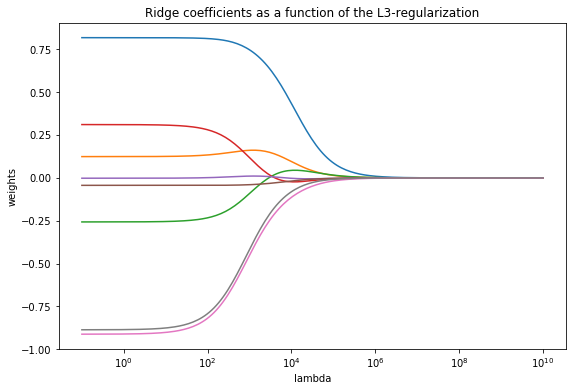

In [127]:
coefs = []
alphas = np.logspace(-1, 10, 200)
clf.set_params(alpha = 0.1)
clf.fit(X3_train, y3_train)
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X3_train, y3_train)
    coefs.append(clf.coef_)

plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the L3-regularization')
plt.show()

### 3.2 

In [128]:
data3 = pd.read_csv('ex2data3.csv') #reading data from file
data3 = data3.drop(['Unnamed: 0'],axis=1)  
X3_train, y3_train, X3_test, y3_test, X3_val, y3_val = complete_split_norm_data_3_1(data3)

In [129]:
scale = [0.1, 1, 100]
clf = Lasso()
for s in scale:
    clf.set_params(alpha = s)
    clf.fit(X3_train, y3_train)
    y_pred = clf.predict(X3_val)
    rmse = mean_squared_error(y_pred, y3_val)
    print "RMSE with validation set when scale is ", s,"= ", rmse

RMSE with validation set when scale is  0.1 =  0.6633172886441726
RMSE with validation set when scale is  1 =  1.3253108655573331
RMSE with validation set when scale is  100 =  1.3253108655573331


In [130]:
# scale = 0.1 has minimum RMSE
s = 0.1
clf.set_params(alpha = s)
clf.fit(X3_train, y3_train)
y_pred = clf.predict(X3_train)
rmse_train = mean_squared_error(y_pred, y3_train)
print "RMSE with training set when scale is ", s,"= ", rmse_train

y_pred = clf.predict(X3_val)
rmse_val = mean_squared_error(y_pred, y3_val)
print "RMSE with validation set when scale is ", s,"= ", rmse_val

y_pred = clf.predict(X3_test)
rmse_test = mean_squared_error(y_pred, y3_test)
print "RMSE with test set when scale is ", s,"= ", rmse_test
weights = clf.coef_
print "Weights = ", weights

RMSE with training set when scale is  0.1 =  0.678769140233625
RMSE with validation set when scale is  0.1 =  0.6633172886441726
RMSE with test set when scale is  0.1 =  0.6637005070257486
Weights =  [ 0.70908699  0.11011146 -0.          0.         -0.         -0.
 -0.0061695  -0.        ]


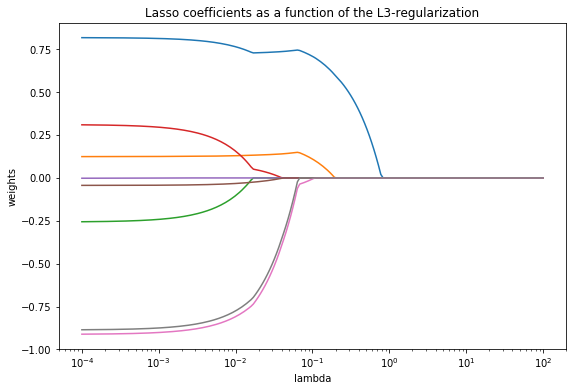

In [131]:
coefs = []
alphas = np.logspace(-4, 2, 200)
clf.set_params(alpha = 0.1)
clf.fit(X3_train, y3_train)
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X3_train, y3_train)
    coefs.append(clf.coef_)

plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the L3-regularization')
plt.show()

### 3.3:  L2 penalty with tensorflow

##### Converged with python 3 for the below code ###
(Rest all code is in python 2 )

In [24]:
def split_train_test_data(X, test_ratio): #splitting data
    np.random.seed(1) #setting random seed 1
    shuffled_indices = np.random.permutation(len(X))
    test_set_size = int(len(X)* test_ratio)
    test_indices = shuffled_indices[: test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return X.iloc[train_indices], X.iloc[test_indices]

In [25]:
# L2 regularization function

def gradient_descent_l2(training_epochs, X_tf, y_tf,n, scale, learning_rate):

    theta = tf.Variable(tf.random_uniform([n+1,1],-1.0,1.0), name = 'theta')
    X = tf.constant(X_tf, dtype = tf.float32, name = 'X')
    y = tf.constant(y_tf.reshape(-1,1), dtype = tf.float32, name ='y')
    y_pred = tf.matmul(X, theta, name = 'Predictions')
    error = y_pred - y
    rmse = tf.sqrt(tf.reduce_mean(tf.square(error)),name = 'rmse')
    base_loss = tf.reduce_mean(tf.square(error), name = 'loss')
    reg_loss = tf.reduce_sum(tf.square(theta))
    loss = tf.add(base_loss, scale/m*reg_loss)
    gradients = 2/m* tf.add(tf.matmul(tf.transpose(X),error), scale*theta)
    training_op = tf.assign(theta, theta - learning_rate*gradients)
    
    c= 0
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        
        sess.run(init)
        for epochs in range (training_epochs):
            c = c+1
            weights = sess.run(training_op) 
            sess.run(rmse)
            rmse_val =rmse.eval()
        
    sess.close()
    return rmse_val, weights


In [26]:
data3 = pd.read_csv('ex2data3.csv') #reading data from file
data3 = data3.drop(['Unnamed: 0'],axis=1) 
#m,n = data3.shapesplit_train_test_data(data3)
train1, test3 = split_train_test_data(data3, 0.2)
train3, validation3 = split_train_test_data(train1, 0.25) #getting normalized split data from the function defined earlier

column = data3.shape[1]

X_train= train3.iloc[:,0:column-1]
X_test= test3.iloc[:,0:column-1]
X_val= validation3.iloc[:,0:column-1]

y_train = train3["price"]  
y_test = test3["price"]  
y_val = validation3["price"]  

X3_train = np.array(X_train)
y3_train = np.array(y_train)

X3_test = np.array(X_test)
y3_test = np.array(y_test)

X3_val = np.array(X_val)
y3_val = np.array(y_val)

scaler = preprocessing.StandardScaler().fit(X3_train)
X3_train_norm = scaler.transform(X3_train) 

In [27]:
m,n = X3_train.shape
X_ones = np.c_[np.ones(X3_train_norm.shape[0]), X3_train_norm] #using X_norm adding ones column

scale = [0.01, 0.1, 1, 10, 100, 1000, 100000, 1000000, 1000000] #input of different values of lambda

weights = []
for s in scale:   
    rmse,weight  =gradient_descent_l2(1000 ,X_ones, y3_train,n, scale = s, learning_rate = 0.01)
    weights.append(weight)
    print ("RMSE = ", rmse, "when scale =", s  )


RMSE =  0.74902505 when scale = 0.01
RMSE =  0.72873735 when scale = 0.1
RMSE =  0.74132895 when scale = 1
RMSE =  0.73361087 when scale = 10
RMSE =  0.7306573 when scale = 100
RMSE =  0.7701544 when scale = 1000
RMSE =  2.1449678 when scale = 100000
RMSE =  2.3497407 when scale = 1000000
RMSE =  2.3497407 when scale = 1000000


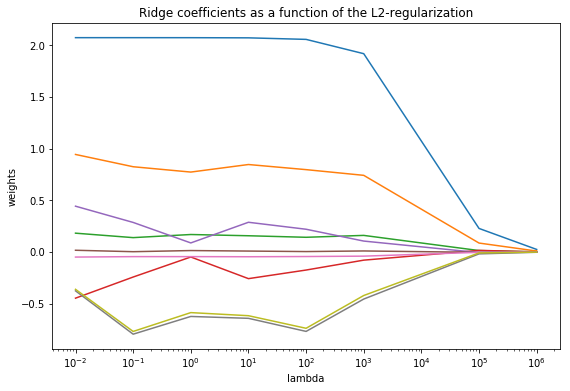

In [28]:
# weights = np.reshape(weights, (-1, 19))                  
weights_arr = np.asarray(weights)
weights_arr = weights_arr.transpose(2,0,1).reshape(len(scale),-1)
#plotting graph for weight vs alpha    
plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(scale, weights_arr)
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the L2-regularization')
plt.show()  

In [29]:
#training/ validation/ test data rmse when scale = 0.1
s = 0.1
m,n = X3_test.shape
X_ones_test = np.c_[np.ones(X3_test.shape[0]), X3_test] #using X_norm adding ones column
X3_test = np.array(X_ones_test)
y3_test = np.array(y3_test)
y3_test = y3_test.reshape(-1,1)

rmse,weight  = gradient_descent_l2(1000 ,X_ones_test, y3_test,n, scale = s, learning_rate = 0.0000001)
print ("RMSE test data = ", rmse, "when scale =", s)

m,n = X3_val.shape
X_ones_val = np.c_[np.ones(X3_val.shape[0]), X3_val] #using X_norm adding ones column
X3_val = np.array(X_ones_val)
y3_val = np.array(y3_val)
y3_val = y3_val.reshape(-1,1)

rmse,weight  =gradient_descent_l2(1000 ,X_ones, y3_train,n, scale = s, learning_rate = 0.0000001)
print ("RMSE training data = ", rmse, "when scale =", s)

RMSE test data =  23.525204 when scale = 0.1
RMSE training data =  3.4618015 when scale = 0.1


### 3.4:  L1 penalty with tensorflow
##### python 3 used in the below code

In [33]:
# L1 regularization function

def gradient_descent_l1(training_epochs, X_tf, y_tf, n,scale, learning_rate):

    theta = tf.Variable(tf.random_uniform([n+1,1],-1.0,1.0), name = 'theta')
    X = tf.constant(X_tf, dtype = tf.float32, name = 'X')
    y = tf.constant(y_tf.reshape(-1,1), dtype = tf.float32, name ='y')

    sess = tf.Session() #initializing the session
    init = tf.global_variables_initializer()

    y_pred = tf.matmul(X, theta, name = 'Predictions')
    error = y_pred - y
    rmse = tf.sqrt(tf.reduce_mean(tf.square(error)),name = 'rmse')
    base_loss = tf.reduce_mean(tf.square(error), name = 'loss')
    reg_loss = tf.reduce_sum(tf.abs(theta))
    loss = tf.add(base_loss, scale/m*reg_loss)


    gradients = 2/m* tf.add(tf.matmul(tf.transpose(X),error), scale*theta)
    training_op = tf.assign(theta, theta - learning_rate*gradients)
    c= 0
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        
        sess.run(init)
        for epochs in range (training_epochs):
            c = c+1
            weights = sess.run(training_op) 
            sess.run(rmse)
            rmse_val =rmse.eval()
        
    sess.close()
    return rmse_val, weights
    

In [34]:
data3 = pd.read_csv('ex2data3.csv') #reading data from file
data3 = data3.drop(['Unnamed: 0'],axis=1) 
#m,n = data3.shapesplit_train_test_data(data3)
train1, test3 = split_train_test_data(data3, 0.2)
train3, validation3 = split_train_test_data(train1, 0.25) #getting normalized split data from the function defined earlier

column = data3.shape[1]

X_train= train3.iloc[:,0:column-1]
X_test= test3.iloc[:,0:column-1]
X_val= validation3.iloc[:,0:column-1]

y_train = train3["price"]  
y_test = test3["price"]  
y_val = validation3["price"]  

X3_train = np.array(X_train)
y3_train = np.array(y_train)

X3_test = np.array(X_test)
y3_test = np.array(y_test)

X3_val = np.array(X_val)
y3_val = np.array(y_val)

scaler = preprocessing.StandardScaler().fit(X3_train)
X3_train_norm = scaler.transform(X3_train) 

In [35]:
m,n = X3_train.shape
X_ones = np.c_[np.ones(X3_train_norm.shape[0]), X3_train_norm] #using X_norm adding ones column

scale = [0.01, 0.1, 1, 10, 100, 1000, 100000, 1000000, 1000000] #input of different values of lambda

weights = []
for s in scale:   
    rmse,weight  =gradient_descent_l1(1000 ,X_ones, y3_train,n, scale = s, learning_rate = 0.01)
    weights.append(weight)
    print ("RMSE = ", rmse, "when scale =", s  )
    
 

RMSE =  0.73573095 when scale = 0.01
RMSE =  0.73349535 when scale = 0.1
RMSE =  0.7427864 when scale = 1
RMSE =  0.72955406 when scale = 10
RMSE =  0.7326881 when scale = 100
RMSE =  0.77373564 when scale = 1000
RMSE =  2.1449678 when scale = 100000
RMSE =  2.3497407 when scale = 1000000
RMSE =  2.3497407 when scale = 1000000


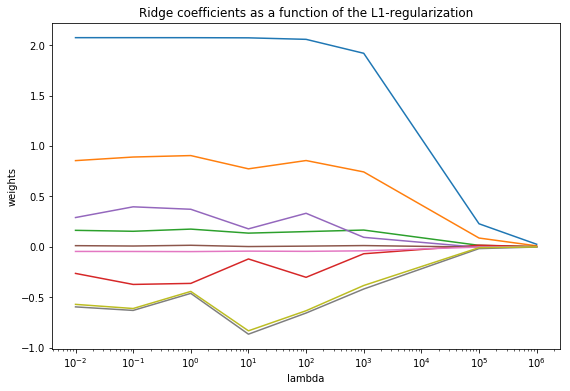

In [36]:
# weights = np.reshape(weights, (-1, 19))                  
weights_arr = np.asarray(weights)
weights_arr = weights_arr.transpose(2,0,1).reshape(len(scale),-1)
#plotting graph for weight vs alpha    
plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(scale, weights_arr)
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the L1-regularization')
plt.show() 

In [38]:
#training/ validation/ test data rmse when scale = 10
s = 10
m,n = X3_test.shape
X_ones_test = np.c_[np.ones(X3_test.shape[0]), X3_test] #using X_norm adding ones column
X3_test = np.array(X_ones_test)
y3_test = np.array(y3_test)
y3_test = y3_test.reshape(-1,1)

rmse,weight  = gradient_descent_l1(1000 ,X_ones_test, y3_test,n, scale = s, learning_rate = 0.0000001)
print ("RMSE test data = ", rmse, "when scale =", s)

m,n = X3_val.shape
X_ones_val = np.c_[np.ones(X3_val.shape[0]), X3_val] #using X_norm adding ones column
X3_val = np.array(X_ones_val)
y3_val = np.array(y3_val)
y3_val = y3_val.reshape(-1,1)

rmse,weight  =gradient_descent_l1(1000 ,X_ones, y3_train,n, scale = s, learning_rate = 0.0000001)
print ("RMSE training data = ", rmse, "when scale =", s)


RMSE test data =  21.814156 when scale = 10
RMSE training data =  2.6850843 when scale = 10
